In [1]:
import uproot
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
%matplotlib inline
import ROOT
import pickle
%jsroot on

Welcome to JupyROOT 6.22/06


In [2]:
chi = uproot.open("/eos/user/n/nkasarag/Info_for_DRN_interpretation/skimmed_ntuple_sim_discrete_chi2method01_0009.root")
chi.allkeys(filterclass=lambda cls: issubclass(cls, uproot.tree.TTreeMethods))

[b'pion_variables_v1;1']

In [3]:
[ i for i in chi["pion_variables_v1"].pandas.df(flatten=False, entrystart=0, entrystop=1).columns]

['event',
 'run',
 'pdgID',
 'beamEnergy',
 'trueBeamEnergy',
 'rechit_shower_start_layer',
 'recoMips',
 'recoMips_trimAhcal',
 'recoMips_AH_trimAhcal',
 'recoMips_EE',
 'recoMips_FH',
 'recoMips_AH',
 'recoFixwt',
 'recoFixwt_trimAhcal',
 'recoFixwt_EE',
 'recoFixwt_FH',
 'recoFixwt_AH',
 'recoFixwt_AH_trimAhcal',
 'chi2Reco',
 'chi2Reco_EE',
 'chi2Reco_FH',
 'chi2Reco_AH',
 'trimAhcal_chi2Reco',
 'trimAhcal_chi2Reco_EE',
 'trimAhcal_chi2Reco_FH',
 'trimAhcal_chi2Reco_AH']

In [4]:
chi_list = ['trueBeamEnergy', 'trimAhcal_chi2Reco',]
chiInfo = chi["pion_variables_v1"].pandas.df(chi_list, flatten=False)
chiInfo.head()

,trueBeamEnergy,trimAhcal_chi2Reco
entry,,
0,20.0,27.573912
1,20.0,12.140466
2,20.0,15.237774
3,20.0,24.594370
4,20.0,14.159868


In [5]:
folder = "/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_mina_1_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_nsm/for_nTuples_with_extra_info"

rawE = np.load("%s/extraInfo_rawE.npy"%folder)
trueE = np.load("%s/extraInfo_trueE.npy"%folder)
trueE.size

293871

In [6]:
with open("%s/pred_tb.pickle"%folder,"rb") as f:
    pred_ratio = pickle.load(f)

In [7]:
semiparam_pred = rawE*((pred_ratio<3)*pred_ratio + (pred_ratio>3)*3)
semiparam_pred

array([ 18.35713381,  14.19671422,  24.18004746, ..., 285.9700738 ,
       316.95828851, 316.94563386])

In [8]:
data = uproot.open("/eos/user/n/nkasarag/Info_for_DRN_interpretation/skimmed_ntuple_sim_discrete_pionHadInfor_08.root")
data.allkeys(filterclass=lambda cls: issubclass(cls, uproot.tree.TTreeMethods))

[b'pion_variables_v1;63', b'pion_variables_v1;62']

In [9]:
[ i for i in data["pion_variables_v1"].pandas.df(flatten=False, entrystart=0, entrystop=1).columns]

['event',
 'run',
 'pdgID',
 'beamEnergy',
 'trueBeamEnergy',
 'isHGC_AHC_sync',
 'isGoodTrack',
 'isFHNoisy',
 'MuonVeto',
 'isInTrackWindow',
 'hgc_channel_mask',
 'ahc_channel_mask',
 'pass_noise_thres',
 'event_orig',
 'NRechits_orig',
 'combined_NRechits',
 'combined_rechits_energy',
 'combined_rechit_x',
 'combined_rechit_y',
 'combined_rechit_z',
 'NRechits',
 'rechit_energy',
 'rechit_x',
 'rechit_y',
 'rechit_z',
 'rechit_cogX',
 'rechit_cogY',
 'rechit_iu',
 'rechit_iv',
 'rechit_iU',
 'rechit_iV',
 'rechit_amplitudeHigh',
 'rechit_amplitudeLow',
 'rechit_noise_flag',
 'rechit_module',
 'rechit_layer',
 'rechit_chip',
 'rechit_channel',
 'rechit_type',
 'rechit_shower_start_layer',
 'rechit_energyPerLayer',
 'rechit_nHitsPerLayer',
 'ntracks',
 'trackChi2_X',
 'trackChi2_Y',
 'dwcReferenceType',
 'm_x',
 'm_y',
 'b_x',
 'b_y',
 'TrackImpactX_layer',
 'TrackImpactY_layer',
 'ahc_nHits',
 'ahc_nHits_orig',
 'ahc_energyPerLayer',
 'ahc_nHitsPerLayer',
 'ahc_hitI',
 'ahc_hitJ',
 

In [10]:
lst = ['trueBeamEnergy','sec_pdgID', 'sec_kin', "NRechits", "nsec", "rechit_shower_start_layer"]

df = data["pion_variables_v1"].pandas.df(lst, flatten=False)#, entrystart=0, entrystop=50)
#df = df.loc[df.nsec>0]
df.head()

,trueBeamEnergy,sec_pdgID,sec_kin,NRechits,nsec,rechit_shower_start_layer
entry,,,,,,
0,20.0,"[1000741860.0, 1000290630.0, -211.0, -211.0, 2...","[1.7193506035255267e-05, 3.848404331074562e-05...",103,22,29
1,20.0,"[111.0, -211.0, 111.0, 2112.0, 2212.0, 111.0, ...","[14.88112306207615, 0.33954408034047534, 0.052...",78,15,29
2,20.0,"[1000290630.0, -211.0, 2112.0, 2212.0, 2112.0,...","[6.184105591819388e-05, 19.065605688195078, 0....",87,22,36
3,20.0,"[-211.0, 111.0, -211.0, 211.0, 2212.0, 2112.0,...","[1.736510645375406, 5.613309508533453, 8.62931...",148,37,21
4,20.0,"[-211.0, 2212.0, 211.0, 2112.0, 2112.0, 111.0,...","[14.050308476210965, 0.11124368847893015, 0.20...",155,43,17


In [11]:
#unique_z = np.unique(np.hstack(df.head().rechit_z.values))
unique_z = np.array([ 13.8775,  14.7675,  16.7825,  17.6725,  19.6875,  20.5775,
        22.6925,  23.5825,  25.6975,  26.5875,  28.7025,  29.5925,
        31.5075,  32.3975,  34.3125,  35.2025,  37.1175,  38.0075,
        39.9225,  40.8125,  42.9075,  44.0375,  46.4125,  47.5425,
        49.682 ,  50.688 ,  52.8815,  53.9035,  64.6185,  71.326 ,
        78.0335,  84.841 ,  91.5485,  98.236 , 115.153 , 122.561 ,
       129.969 , 137.796 , 145.203 , 152.511 ])

In [12]:
unique_z.size

40

In [13]:
df.loc[df.trueBeamEnergy==20.0].trueBeamEnergy.values.size

34957

In [14]:
np.sum(df.loc[df.trueBeamEnergy==20.0].rechit_shower_start_layer.values<0)/34957

0.0

(array([14602., 11738., 11462., 10046., 10367.,  9215.,  9476.,  8524.,
         8579.,  7868.,  7798.,  7020.,  7208.,     0.,  6501.,  6593.,
         6048.,  6267.,  5633.,  5431.,  6198.,  5475.,  5742.,  4959.,
         4858.,  5064.,     0.,  4040., 19489., 19173., 13627., 10795.,
         8394.,  6320.,  6768.,  3844.,  3308.,  2533.,  1557.,  1351.]),
 array([ 3.   ,  3.925,  4.85 ,  5.775,  6.7  ,  7.625,  8.55 ,  9.475,
        10.4  , 11.325, 12.25 , 13.175, 14.1  , 15.025, 15.95 , 16.875,
        17.8  , 18.725, 19.65 , 20.575, 21.5  , 22.425, 23.35 , 24.275,
        25.2  , 26.125, 27.05 , 27.975, 28.9  , 29.825, 30.75 , 31.675,
        32.6  , 33.525, 34.45 , 35.375, 36.3  , 37.225, 38.15 , 39.075,
        40.   ]),
 <BarContainer object of 40 artists>)

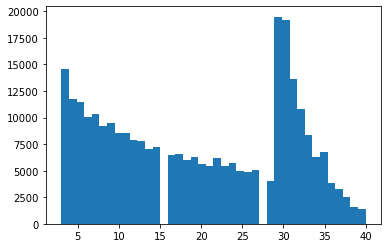

In [15]:
plt.hist(df.rechit_shower_start_layer.values, bins=40)

In [16]:
df["chi2_pred"] = chiInfo.trimAhcal_chi2Reco.values
df["semiparam_pred"] = semiparam_pred

df.head()

,trueBeamEnergy,sec_pdgID,sec_kin,NRechits,nsec,rechit_shower_start_layer,chi2_pred,semiparam_pred
entry,,,,,,,,
0,20.0,"[1000741860.0, 1000290630.0, -211.0, -211.0, 2...","[1.7193506035255267e-05, 3.848404331074562e-05...",103,22,29,27.573912,18.357134
1,20.0,"[111.0, -211.0, 111.0, 2112.0, 2212.0, 111.0, ...","[14.88112306207615, 0.33954408034047534, 0.052...",78,15,29,12.140466,14.196714
2,20.0,"[1000290630.0, -211.0, 2112.0, 2212.0, 2112.0,...","[6.184105591819388e-05, 19.065605688195078, 0....",87,22,36,15.237774,24.180047
3,20.0,"[-211.0, 111.0, -211.0, 211.0, 2212.0, 2112.0,...","[1.736510645375406, 5.613309508533453, 8.62931...",148,37,21,24.594370,24.772810
4,20.0,"[-211.0, 2212.0, 211.0, 2112.0, 2112.0, 111.0,...","[14.050308476210965, 0.11124368847893015, 0.20...",155,43,17,14.159868,18.550997


In [17]:
def ene_pi0(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==111.0])

def frac_ene_pi0(df_):
    return np.sum(df_.sec_kin[df_.sec_pdgID==111.0])/df_.trueBeamEnergy

In [18]:
df["num_pi0"] = df.sec_pdgID.map(lambda x : np.sum(x==111.0))
df["ene_pi0"] = df.apply(ene_pi0, axis=1)
df["frac_ene_pi0"] = df.apply(frac_ene_pi0, axis=1)
df.head()

,trueBeamEnergy,sec_pdgID,sec_kin,NRechits,nsec,rechit_shower_start_layer,chi2_pred,semiparam_pred,num_pi0,ene_pi0,frac_ene_pi0
entry,,,,,,,,,,,
0,20.0,"[1000741860.0, 1000290630.0, -211.0, -211.0, 2...","[1.7193506035255267e-05, 3.848404331074562e-05...",103,22,29,27.573912,18.357134,1,2.381683,0.119084
1,20.0,"[111.0, -211.0, 111.0, 2112.0, 2212.0, 111.0, ...","[14.88112306207615, 0.33954408034047534, 0.052...",78,15,29,12.140466,14.196714,3,15.607616,0.780381
2,20.0,"[1000290630.0, -211.0, 2112.0, 2212.0, 2112.0,...","[6.184105591819388e-05, 19.065605688195078, 0....",87,22,36,15.237774,24.180047,0,0.000000,0.000000
3,20.0,"[-211.0, 111.0, -211.0, 211.0, 2212.0, 2112.0,...","[1.736510645375406, 5.613309508533453, 8.62931...",148,37,21,24.594370,24.772810,1,5.613310,0.280665
4,20.0,"[-211.0, 2212.0, 211.0, 2112.0, 2112.0, 111.0,...","[14.050308476210965, 0.11124368847893015, 0.20...",155,43,17,14.159868,18.550997,2,0.876244,0.043812


In [19]:
def lead_pi0(df_):
    
    max_ene_sec = np.max(df_.sec_kin)
    
    max_ene_sec_pdgID = np.sum(df_.sec_pdgID[df_.sec_kin==max_ene_sec])
    #print((max_ene_sec_pdgID))
    
    if max_ene_sec_pdgID==111.0: return max_ene_sec/df_.trueBeamEnergy
    
    else: return -1

#df["lead_pi0"] = df.apply(lead_pi0, axis=1)
df.head()

,trueBeamEnergy,sec_pdgID,sec_kin,NRechits,nsec,rechit_shower_start_layer,chi2_pred,semiparam_pred,num_pi0,ene_pi0,frac_ene_pi0
entry,,,,,,,,,,,
0,20.0,"[1000741860.0, 1000290630.0, -211.0, -211.0, 2...","[1.7193506035255267e-05, 3.848404331074562e-05...",103,22,29,27.573912,18.357134,1,2.381683,0.119084
1,20.0,"[111.0, -211.0, 111.0, 2112.0, 2212.0, 111.0, ...","[14.88112306207615, 0.33954408034047534, 0.052...",78,15,29,12.140466,14.196714,3,15.607616,0.780381
2,20.0,"[1000290630.0, -211.0, 2112.0, 2212.0, 2112.0,...","[6.184105591819388e-05, 19.065605688195078, 0....",87,22,36,15.237774,24.180047,0,0.000000,0.000000
3,20.0,"[-211.0, 111.0, -211.0, 211.0, 2212.0, 2112.0,...","[1.736510645375406, 5.613309508533453, 8.62931...",148,37,21,24.594370,24.772810,1,5.613310,0.280665
4,20.0,"[-211.0, 2212.0, 211.0, 2112.0, 2112.0, 111.0,...","[14.050308476210965, 0.11124368847893015, 0.20...",155,43,17,14.159868,18.550997,2,0.876244,0.043812


In [20]:
df_50 = df.loc[df.trueBeamEnergy==20.0]
df_100 = df.loc[df.trueBeamEnergy==100.0]
df_300 = df.loc[df.trueBeamEnergy==300.0]
df_300.head()

,trueBeamEnergy,sec_pdgID,sec_kin,NRechits,nsec,rechit_shower_start_layer,chi2_pred,semiparam_pred,num_pi0,ene_pi0,frac_ene_pi0
entry,,,,,,,,,,,
257933,300.0,"[11.0, -11.0, 1000290630.0, 11.0, -11.0, 10002...","[0.00019040544363479138, 0.0022264462662353168...",649,71,30,333.523224,315.221276,5,17.225625,0.057419
257934,300.0,"[11.0, -11.0, 1000290650.0, 111.0, 111.0, 2112...","[0.28268598028011516, 0.22983738540429954, 3.3...",715,48,26,400.388947,313.515400,5,183.426181,0.611421
257935,300.0,"[1000822080.0, 11.0, -11.0, 111.0, -211.0, -21...","[7.687207282288e-06, 0.8329552406059793, 0.001...",703,67,26,366.008179,302.336640,9,146.677598,0.488925
257936,300.0,"[1000822060.0, 11.0, -11.0, -211.0, 2112.0, 22...","[5.0339226472964e-06, 0.3745134022253068, 0.09...",760,44,29,322.744781,311.518889,0,0.000000,0.000000
257937,300.0,"[11.0, -11.0, 11.0, -11.0, 1000260560.0, -211....","[0.05689318081813574, 0.010882962826564258, 0....",613,43,29,343.592987,321.505826,6,134.594942,0.448650


In [23]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} created in first hadronic interaction; #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)


x = df_50.frac_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        

        
H_pion.Draw()


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [22]:
c=ROOT.TCanvas()

bins=100
xmin=0
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by the leading #pi^{0} in first hadronic interaction; #pi^{0}_{lead};Normalized Entries", bins,xmin,xmax)


x = df_50.lead_pi0.values
for i in range(x.size):
       if x[i]>-1: H_pion.Fill(x[i])
        

        
H_pion.Draw()


#H_pion3.GetYaxis().SetRangeUser(0,100000);

#ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

AttributeError: 'DataFrame' object has no attribute 'lead_pi0'

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [24]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of energy carried by all #pi^{0} created in first hadronic interaction; #pi^{0}_{f};Normalized Entries", bins,xmin,xmax)


x = df_50.loc[(df_50.rechit_shower_start_layer<=7) & (df_50.rechit_shower_start_layer>=3)].frac_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        

        
H_pion.Draw()


#H_pion3.GetYaxis().SetRangeUser(0,100000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).


In [35]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion_20","; #pi^{0}_{f};Frequency", bins,xmin,xmax)


x = df_50.frac_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
H_pion.SetLineColor(1)
        
    
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

    
H_pion.Draw()




line = ROOT.TLine( 0.1, 0, 0.1, 15000 )
line.SetLineStyle(2)
line.Draw()
line.DrawLine( 0.3, 0, 0.3, 15000 )
line.DrawLine( 0.6, 0, 0.6, 15000 )
line.SetLineStyle(2)


text = ROOT.TText(0.01, 8, "bin1")
text.SetTextColor(2)
text.Draw()

text2 = ROOT.TText(0.16, 8, "bin2")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TText(0.4, 8, "bin3")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TText(0.75, 8, "bin4")
text4.SetTextColor(6)
text4.Draw()

H_pion.GetYaxis().SetRangeUser(1,15000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_with_bins_20GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion_20 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_with_bins_20GeV.pdf has been created


In [32]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion_100","; #pi^{0}_{f};Frequency", bins,xmin,xmax)


x = df_100.frac_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
H_pion.SetLineColor(1)
        
    
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
    
H_pion.Draw()




line = ROOT.TLine( 0.1, 0, 0.1, 15000 )
line.SetLineStyle(2)
line.Draw()
line.DrawLine( 0.3, 0, 0.3, 15000 )
line.DrawLine( 0.6, 0, 0.6, 15000 )
line.SetLineStyle(2)


text = ROOT.TText(0.01, 8, "bin1")
text.SetTextColor(2)
text.Draw()

text2 = ROOT.TText(0.16, 8, "bin2")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TText(0.4, 8, "bin3")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TText(0.75, 8, "bin4")
text4.SetTextColor(6)
text4.Draw()

H_pion.GetYaxis().SetRangeUser(1,15000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_with_bins_100GeV.pdf")

Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_with_bins_100GeV.pdf has been created


In [33]:
c=ROOT.TCanvas()

bins=100
xmin=-0.05
xmax=1.05

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion_300","; #pi^{0}_{f};Frequency", bins,xmin,xmax)


x = df_300.frac_ene_pi0.values
for i in range(x.size):
        H_pion.Fill(x[i])
        
H_pion.SetLineColor(1)

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
        
H_pion.Draw()




line = ROOT.TLine( 0.1, 0, 0.1, 15000 )
line.SetLineStyle(2)
line.Draw()
line.DrawLine( 0.3, 0, 0.3, 15000 )
line.DrawLine( 0.6, 0, 0.6, 15000 )
line.SetLineStyle(2)


text = ROOT.TText(0.01, 8, "bin1")
text.SetTextColor(2)
text.Draw()

text2 = ROOT.TText(0.16, 8, "bin2")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TText(0.4, 8, "bin3")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TText(0.75, 8, "bin4")
text4.SetTextColor(6)
text4.Draw()

H_pion.GetYaxis().SetRangeUser(1,15000);

ROOT.gPad.SetLogy()



#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_with_bins_300GeV.pdf")

Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_with_bins_300GeV.pdf has been created


In [36]:

c=ROOT.TCanvas()

bins=100
xmin=-0.01
xmax=1.01

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","Fraction of KE Carried by #pi^{0}s; #pi^{0}_{frac};Frequency", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion3 = ROOT.TH1F("H_pion3","Fraction KE of #pi^{0}s; #pi^{0}_{frac};Frequency", bins,xmin,xmax)

x = df_50.frac_ene_pi0.values
y = df_100.frac_ene_pi0.values
z = df_300.frac_ene_pi0.values

for i in range(x.size):
        H_pion.Fill(x[i])
        H_pion1.Fill(x[i])
        
for i in range(y.size):
        H_pion.Fill(y[i])
        H_pion2.Fill(y[i])
        
for i in range(z.size):
        H_pion.Fill(z[i])
        H_pion3.Fill(z[i])
        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(1)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
H_pion3.SetLineColor(4)     

H_pion3.Draw()
H_pion1.Draw("same")
H_pion2.Draw("same")
#H_pion.Draw("same")

H_pion3.GetYaxis().SetRangeUser(0,15000);

ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
#legend.AddEntry("H_pion","Inclusive","l");
legend.AddEntry("H_pion1","50 GeV","l");
legend.AddEntry("H_pion2","100 GeV","l");
legend.AddEntry("H_pion3","300 GeV","l");


legend.Draw();

#c.SetGrid()
c.Draw()

Error in <THistPainter::PaintInit>: Cannot set Y axis to log scale


In [46]:

c=ROOT.TCanvas()

bins=100
xmin=0
xmax=200

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","#chi^{2} Prediction; Energy [GeV];Frequency", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion3 = ROOT.TH1F("H_pion3","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)
H_pion4 = ROOT.TH1F("H_pion4","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)

lis = [0.1, 0.3, 0.6]

x = df_100.loc[(df_100.frac_ene_pi0<=lis[0])].chi2_pred.values
y = df_100.loc[(df_100.frac_ene_pi0>lis[0]) & (df_100.frac_ene_pi0<=lis[1])].chi2_pred.values
z = df_100.loc[(df_100.frac_ene_pi0>lis[1]) & (df_100.frac_ene_pi0<=lis[2])].chi2_pred.values
a = df_100.loc[(df_100.frac_ene_pi0>lis[2])].chi2_pred.values

for i in range(x.size):
        H_pion.Fill(x[i])
        H_pion1.Fill(x[i])
        
for i in range(y.size):
        H_pion.Fill(y[i])
        H_pion2.Fill(y[i])
        
for i in range(z.size):
        H_pion.Fill(z[i])
        H_pion3.Fill(z[i])
        
for i in range(a.size):
        H_pion.Fill(a[i])
        H_pion4.Fill(a[i])
        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(1)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
H_pion3.SetLineColor(4)
H_pion4.SetLineColor(6) 

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
H_pion.GetYaxis().SetTitleOffset(1) 

H_pion.Draw()
H_pion1.Draw("same")
H_pion2.Draw("same")
H_pion3.Draw("same")
H_pion4.Draw("same")

line = ROOT.TLine( 100, 0, 100, 1920 )
line.SetLineStyle(2)
line.Draw()

yst = 1700
cng = 150
xst = 20

text = ROOT.TLatex(xst, yst, "Inclusive")
text.Draw()

text1 = ROOT.TLatex(xst, yst-cng, "#pi^{0}_{f} #leq 0.1")
text1.SetTextColor(2)
text1.Draw()

text2 = ROOT.TLatex(xst, yst-2*cng, "0.1 < #pi^{0}_{f} #leq 0.3")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TLatex(xst, yst-3*cng, "0.3 < #pi^{0}_{f} #leq 0.6")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TLatex(xst, yst-4*cng, "#pi^{0}_{f} > 0.6")
text4.SetTextColor(6)
text4.Draw()

#H_pion3.GetYaxis().SetRangeUser(0,15000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Inclusive","l");
legend.AddEntry("H_pion1","#pi^{0}_{frac}< 0.05","l");
legend.AddEntry("H_pion2","0.1 <#pi^{0}_{frac}< 0.3","l");
legend.AddEntry("H_pion3","0.3 <#pi^{0}_{frac}< 0.6","l");
legend.AddEntry("H_pion4","#pi^{0}_{frac}> 0.6","l");

#legend.Draw();

#c.SetGrid()
c.Draw()

ROOT.gStyle.SetOptStat(0);

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/chi2_pi0_pred_100GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion4 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/chi2_pi0_pred_100GeV.pdf has been created


In [47]:

c=ROOT.TCanvas()

bins=100
xmin=0
xmax=200

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","DRN Prediction; Energy [GeV];Frequency", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion3 = ROOT.TH1F("H_pion3","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)
H_pion4 = ROOT.TH1F("H_pion4","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)

lis = [0.1, 0.3, 0.6]

x = df_100.loc[(df_100.frac_ene_pi0<=lis[0])].semiparam_pred.values
y = df_100.loc[(df_100.frac_ene_pi0>lis[0]) & (df_100.frac_ene_pi0<=lis[1])].semiparam_pred.values
z = df_100.loc[(df_100.frac_ene_pi0>lis[1]) & (df_100.frac_ene_pi0<=lis[2])].semiparam_pred.values
a = df_100.loc[(df_100.frac_ene_pi0>lis[2])].semiparam_pred.values

for i in range(x.size):
        H_pion.Fill(x[i])
        H_pion1.Fill(x[i])
        
for i in range(y.size):
        H_pion.Fill(y[i])
        H_pion2.Fill(y[i])
        
for i in range(z.size):
        H_pion.Fill(z[i])
        H_pion3.Fill(z[i])
        
for i in range(a.size):
        H_pion.Fill(a[i])
        H_pion4.Fill(a[i])
        
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
H_pion.GetYaxis().SetTitleOffset(1) 

H_pion.SetLineColor(1)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
H_pion3.SetLineColor(4)
H_pion4.SetLineColor(6) 

H_pion.Draw()
H_pion1.Draw("same")
H_pion2.Draw("same")
H_pion3.Draw("same")
H_pion4.Draw("same")

line = ROOT.TLine( 100, 0, 100, 4050 )
line.SetLineStyle(2)
line.Draw()


yst = 3550
cng = 300
xst = 20

text = ROOT.TLatex(xst, yst, "Inclusive")
text.Draw()

text1 = ROOT.TLatex(xst, yst-cng, "#pi^{0}_{f} #leq 0.1")
text1.SetTextColor(2)
text1.Draw()

text2 = ROOT.TLatex(xst, yst-2*cng, "0.1 < #pi^{0}_{f} #leq 0.3")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TLatex(xst, yst-3*cng, "0.3 < #pi^{0}_{f} #leq 0.6")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TLatex(xst, yst-4*cng, "#pi^{0}_{f} > 0.6")
text4.SetTextColor(6)
text4.Draw()

#H_pion3.GetYaxis().SetRangeUser(0,15000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Inclusive","l");
legend.AddEntry("H_pion1","#pi^{0}_{frac}< 0.05","l");
legend.AddEntry("H_pion2","0.1 <#pi^{0}_{frac}< 0.3","l");
legend.AddEntry("H_pion3","0.3 <#pi^{0}_{frac}< 0.6","l");
legend.AddEntry("H_pion4","#pi^{0}_{frac}> 0.6","l");

#legend.Draw();

#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/DRN_pi0_pred_100GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion4 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/DRN_pi0_pred_100GeV.pdf has been created


In [48]:

c=ROOT.TCanvas()

bins=100
xmin=-10
xmax=50

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","#chi^{2} Prediction; Energy [GeV];Frequency", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion3 = ROOT.TH1F("H_pion3","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)
H_pion4 = ROOT.TH1F("H_pion4","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)

lis = [0.1, 0.3, 0.6]

x = df_50.loc[(df_50.frac_ene_pi0<=lis[0])].chi2_pred.values
y = df_50.loc[(df_50.frac_ene_pi0>lis[0]) & (df_50.frac_ene_pi0<=lis[1])].chi2_pred.values
z = df_50.loc[(df_50.frac_ene_pi0>lis[1]) & (df_50.frac_ene_pi0<=lis[2])].chi2_pred.values
a = df_50.loc[(df_50.frac_ene_pi0>lis[2])].chi2_pred.values

for i in range(x.size):
        H_pion.Fill(x[i])
        H_pion1.Fill(x[i])
        
for i in range(y.size):
        H_pion.Fill(y[i])
        H_pion2.Fill(y[i])
        
for i in range(z.size):
        H_pion.Fill(z[i])
        H_pion3.Fill(z[i])
        
for i in range(a.size):
        H_pion.Fill(a[i])
        H_pion4.Fill(a[i])
        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(1)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
H_pion3.SetLineColor(4)
H_pion4.SetLineColor(6) 

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
H_pion.GetYaxis().SetTitleOffset(1) 

H_pion.Draw()
H_pion1.Draw("same")
H_pion2.Draw("same")
H_pion3.Draw("same")
H_pion4.Draw("same")


line = ROOT.TLine( 20, 0, 20, 1500 )
line.SetLineStyle(2)
line.Draw()


yst = 1300
cng = 100
xst = -6

text = ROOT.TLatex(xst, yst, "Inclusive")
text.Draw()

text1 = ROOT.TLatex(xst, yst-cng, "#pi^{0}_{f} #leq 0.1")
text1.SetTextColor(2)
text1.Draw()

text2 = ROOT.TLatex(xst, yst-2*cng, "0.1 < #pi^{0}_{f} #leq 0.3")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TLatex(xst, yst-3*cng, "0.3 < #pi^{0}_{f} #leq 0.6")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TLatex(xst, yst-4*cng, "#pi^{0}_{f} > 0.6")
text4.SetTextColor(6)
text4.Draw()

#H_pion3.GetYaxis().SetRangeUser(0,15000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Inclusive","l");
legend.AddEntry("H_pion1","#pi^{0}_{frac}< 0.05","l");
legend.AddEntry("H_pion2","0.1 <#pi^{0}_{frac}< 0.3","l");
legend.AddEntry("H_pion3","0.3 <#pi^{0}_{frac}< 0.6","l");
legend.AddEntry("H_pion4","#pi^{0}_{frac}> 0.6","l");

#legend.Draw();

#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/chi2_pi0_pred_20GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion4 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/chi2_pi0_pred_20GeV.pdf has been created


In [49]:

c=ROOT.TCanvas()

bins=100
xmin=-10
xmax=50

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","DRN Prediction; Energy [GeV];Frequency", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion3 = ROOT.TH1F("H_pion3","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)
H_pion4 = ROOT.TH1F("H_pion4","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)

lis = [0.1, 0.3, 0.6]

x = df_50.loc[(df_50.frac_ene_pi0<lis[0])].semiparam_pred.values
y = df_50.loc[(df_50.frac_ene_pi0>lis[0]) & (df_50.frac_ene_pi0<lis[1])].semiparam_pred.values
z = df_50.loc[(df_50.frac_ene_pi0>lis[1]) & (df_50.frac_ene_pi0<lis[2])].semiparam_pred.values
a = df_50.loc[(df_50.frac_ene_pi0>lis[2])].semiparam_pred.values

for i in range(x.size):
        H_pion.Fill(x[i])
        H_pion1.Fill(x[i])
        
for i in range(y.size):
        H_pion.Fill(y[i])
        H_pion2.Fill(y[i])
        
for i in range(z.size):
        H_pion.Fill(z[i])
        H_pion3.Fill(z[i])
        
for i in range(a.size):
        H_pion.Fill(a[i])
        H_pion4.Fill(a[i])
        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(1)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
H_pion3.SetLineColor(4)
H_pion4.SetLineColor(6) 

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
H_pion.GetYaxis().SetTitleOffset(1) 

H_pion.Draw()
H_pion1.Draw("same")
H_pion2.Draw("same")
H_pion3.Draw("same")
H_pion4.Draw("same")


line = ROOT.TLine( 20, 0, 20, 2950 )
line.SetLineStyle(2)
line.Draw()


yst = 2600
cng = 200
xst = -6

text = ROOT.TLatex(xst, yst, "Inclusive")
text.Draw()

text1 = ROOT.TLatex(xst, yst-cng, "#pi^{0}_{f} #leq 0.1")
text1.SetTextColor(2)
text1.Draw()

text2 = ROOT.TLatex(xst, yst-2*cng, "0.1 < #pi^{0}_{f} #leq 0.3")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TLatex(xst, yst-3*cng, "0.3 < #pi^{0}_{f} #leq 0.6")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TLatex(xst, yst-4*cng, "#pi^{0}_{f} > 0.6")
text4.SetTextColor(6)
text4.Draw()


#H_pion3.GetYaxis().SetRangeUser(0,15000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Inclusive","l");
legend.AddEntry("H_pion1","#pi^{0}_{frac}< 0.05","l");
legend.AddEntry("H_pion2","0.1 <#pi^{0}_{frac}< 0.3","l");
legend.AddEntry("H_pion3","0.3 <#pi^{0}_{frac}< 0.6","l");
legend.AddEntry("H_pion4","#pi^{0}_{frac}> 0.6","l");

#legend.Draw();

#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/DRN_pi0_pred_20GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion4 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/DRN_pi0_pred_20GeV.pdf has been created


In [50]:

c=ROOT.TCanvas()

bins=100
xmin=150
xmax=450

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","#chi^{2} Prediction; Energy [GeV];Frequency", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion3 = ROOT.TH1F("H_pion3","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)
H_pion4 = ROOT.TH1F("H_pion4","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)

lis = [0.1, 0.3, 0.6]

x = df_300.loc[(df_300.frac_ene_pi0<lis[0])].chi2_pred.values
y = df_300.loc[(df_300.frac_ene_pi0>lis[0]) & (df_300.frac_ene_pi0<lis[1])].chi2_pred.values
z = df_300.loc[(df_300.frac_ene_pi0>lis[1]) & (df_300.frac_ene_pi0<lis[2])].chi2_pred.values
a = df_300.loc[(df_300.frac_ene_pi0>lis[2])].chi2_pred.values

for i in range(x.size):
        H_pion.Fill(x[i])
        H_pion1.Fill(x[i])
        
for i in range(y.size):
        H_pion.Fill(y[i])
        H_pion2.Fill(y[i])
        
for i in range(z.size):
        H_pion.Fill(z[i])
        H_pion3.Fill(z[i])
        
for i in range(a.size):
        H_pion.Fill(a[i])
        H_pion4.Fill(a[i])
        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(1)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
H_pion3.SetLineColor(4)
H_pion4.SetLineColor(6) 

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
H_pion.GetYaxis().SetTitleOffset(1) 

H_pion.Draw()
H_pion1.Draw("same")
H_pion2.Draw("same")
H_pion3.Draw("same")
H_pion4.Draw("same")



line = ROOT.TLine( 300, 0, 300, 1320 )
line.SetLineStyle(2)
line.Draw()


yst = 1150
cng = 100
xst = 175

text = ROOT.TLatex(xst, yst, "Inclusive")
text.Draw()

text1 = ROOT.TLatex(xst, yst-cng, "#pi^{0}_{f} #leq 0.1")
text1.SetTextColor(2)
text1.Draw()

text2 = ROOT.TLatex(xst, yst-2*cng, "0.1 < #pi^{0}_{f} #leq 0.3")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TLatex(xst, yst-3*cng, "0.3 < #pi^{0}_{f} #leq 0.6")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TLatex(xst, yst-4*cng, "#pi^{0}_{f} > 0.6")
text4.SetTextColor(6)
text4.Draw()

#H_pion3.GetYaxis().SetRangeUser(0,15000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Inclusive","l");
legend.AddEntry("H_pion1","#pi^{0}_{frac}< 0.05","l");
legend.AddEntry("H_pion2","0.1 <#pi^{0}_{frac}< 0.3","l");
legend.AddEntry("H_pion3","0.3 <#pi^{0}_{frac}< 0.6","l");
legend.AddEntry("H_pion4","#pi^{0}_{frac}> 0.6","l");

#legend.Draw();

#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/chi2_pi0_pred_300GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion4 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/chi2_pi0_pred_300GeV.pdf has been created


In [51]:

c=ROOT.TCanvas()

bins=100
xmin=150
xmax=450

#c.SetGrid()
H_pion = ROOT.TH1F("H_pion","DRN Prediction; Energy [GeV];Frequency", bins,xmin,xmax)
H_pion1 = ROOT.TH1F("H_pion1","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion2 = ROOT.TH1F("H_pion2","Number of #pi^{0}; Number of #pi^{0};Frequency", bins,xmin,xmax)
H_pion3 = ROOT.TH1F("H_pion3","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)
H_pion4 = ROOT.TH1F("H_pion4","Fraction of Energy Carried by #pi^{0}; Fraction;Frequency", bins,xmin,xmax)

lis = [0.1, 0.3, 0.6]

x = df_300.loc[(df_300.frac_ene_pi0<lis[0])].semiparam_pred.values
y = df_300.loc[(df_300.frac_ene_pi0>lis[0]) & (df_300.frac_ene_pi0<lis[1])].semiparam_pred.values
z = df_300.loc[(df_300.frac_ene_pi0>lis[1]) & (df_300.frac_ene_pi0<lis[2])].semiparam_pred.values
a = df_300.loc[(df_300.frac_ene_pi0>lis[2])].semiparam_pred.values

for i in range(x.size):
        H_pion.Fill(x[i])
        H_pion1.Fill(x[i])
        
for i in range(y.size):
        H_pion.Fill(y[i])
        H_pion2.Fill(y[i])
        
for i in range(z.size):
        H_pion.Fill(z[i])
        H_pion3.Fill(z[i])
        
for i in range(a.size):
        H_pion.Fill(a[i])
        H_pion4.Fill(a[i])
        
#H_pion.Draw("COlZ")

H_pion.SetLineColor(1)
H_pion1.SetLineColor(2)
H_pion2.SetLineColor(3)
H_pion3.SetLineColor(4)
H_pion4.SetLineColor(6)

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)
H_pion.GetYaxis().SetTitleOffset(1) 

H_pion.Draw()
H_pion1.Draw("same")
H_pion2.Draw("same")
H_pion3.Draw("same")
H_pion4.Draw("same")


line = ROOT.TLine( 300, 0, 300, 3200 )
line.SetLineStyle(2)
line.Draw()


yst = 2800
cng = 250
xst = 175

text = ROOT.TLatex(xst, yst, "Inclusive")
text.Draw()

text1 = ROOT.TLatex(xst, yst-cng, "#pi^{0}_{f} #leq 0.1")
text1.SetTextColor(2)
text1.Draw()

text2 = ROOT.TLatex(xst, yst-2*cng, "0.1 < #pi^{0}_{f} #leq 0.3")
text2.SetTextColor(3)
text2.Draw()

text3 = ROOT.TLatex(xst, yst-3*cng, "0.3 < #pi^{0}_{f} #leq 0.6")
text3.SetTextColor(4)
text3.Draw()

text4 = ROOT.TLatex(xst, yst-4*cng, "#pi^{0}_{f} > 0.6")
text4.SetTextColor(6)
text4.Draw()

#H_pion3.GetYaxis().SetRangeUser(0,15000);

#ROOT.gPad.SetLogy()

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Inclusive","l");
legend.AddEntry("H_pion1","#pi^{0}_{frac}< 0.05","l");
legend.AddEntry("H_pion2","0.1 <#pi^{0}_{frac}< 0.3","l");
legend.AddEntry("H_pion3","0.3 <#pi^{0}_{frac}< 0.6","l");
legend.AddEntry("H_pion4","#pi^{0}_{frac}> 0.6","l");

#legend.Draw();

#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/DRN_pi0_pred_300GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_pion4 (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pio_f_pred_diff_bins/DRN_pi0_pred_300GeV.pdf has been created


In [59]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";#pi^{0}_{f};DRN Prediction [GeV]",200,0.0,1.01, 200,-0.5,200)


for i in range(df_100.frac_ene_pi0.values.size):
        H_pion.Fill(df_100.frac_ene_pi0.values[i], df_100.semiparam_pred.values[i])
        

    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized("COlZ")

line = ROOT.TLine( 0, 100, 1.01, 100 )
line.SetLineStyle(9)
#line.SetLineWidth(2)
line.Draw()
c.SetLogz()
#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/DRN_pi0_f_vs_pred_100GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/DRN_pi0_f_vs_pred_100GeV.pdf has been created


In [60]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";#pi^{0}_{f};#chi^{2} Prediction [GeV]",200,0.0,1.01, 200,-0.5,200)


for i in range(df_100.frac_ene_pi0.values.size):
        H_pion.Fill(df_100.frac_ene_pi0.values[i], df_100.chi2_pred.values[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized("COlZ")

line = ROOT.TLine( 0, 100, 1.01, 100 )
line.SetLineStyle(9)
#line.SetLineWidth(2)
line.Draw()
c.SetLogz()
#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/chi2_pi0_f_vs_pred_100GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/chi2_pi0_f_vs_pred_100GeV.pdf has been created


In [61]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";#pi^{0}_{f};DRN Prediction [GeV]",200,0.0,1.01, 200,-10,50)


for i in range(df_50.frac_ene_pi0.values.size):
        H_pion.Fill(df_50.frac_ene_pi0.values[i], df_50.semiparam_pred.values[i])
    
#H_pion.Draw("COlZ")
H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized("COlZ")

line = ROOT.TLine( 0, 20, 1.01, 20 )
line.SetLineStyle(9)
#line.SetLineWidth(2)
line.Draw()
c.SetLogz()
#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/DRN_pi0_f_vs_pred_20GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/DRN_pi0_f_vs_pred_20GeV.pdf has been created


In [62]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";#pi^{0}_{f};#chi^{2} Prediction [GeV]",200,0.0,1.01, 200,-10,50)


for i in range(df_50.frac_ene_pi0.values.size):
        H_pion.Fill(df_50.frac_ene_pi0.values[i], df_50.chi2_pred.values[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized("COlZ")

line = ROOT.TLine( 0, 20, 1.01, 20 )
line.SetLineStyle(9)
#line.SetLineWidth(2)
line.Draw()
c.SetLogz()
#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/chi2_pi0_f_vs_pred_20GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/chi2_pi0_f_vs_pred_20GeV.pdf has been created


In [63]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";#pi^{0}_{f};DRN Prediction [GeV]",200,0.0,1.01, 200,100,500)


for i in range(df_300.frac_ene_pi0.values.size):
        H_pion.Fill(df_300.frac_ene_pi0.values[i], df_300.semiparam_pred.values[i])
        

    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized("COlZ")

line = ROOT.TLine( 0, 300, 1.01, 300 )
line.SetLineStyle(9)
#line.SetLineWidth(2)
line.Draw()
c.SetLogz()
#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/DRN_pi0_f_vs_pred_300GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/DRN_pi0_f_vs_pred_300GeV.pdf has been created


In [64]:
c=ROOT.TCanvas()

#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";#pi^{0}_{f};#chi^{2} Prediction [GeV]",200,0.0,1.01, 200,100,500)


for i in range(df_300.frac_ene_pi0.values.size):
        H_pion.Fill(df_300.frac_ene_pi0.values[i], df_300.chi2_pred.values[i])
    
#H_pion.Draw("COlZ")

H_pion.GetXaxis().SetTitleSize(0.045)

H_pion.GetYaxis().SetTitleSize(0.045)

H_pion.DrawNormalized("COlZ")

line = ROOT.TLine( 0, 300, 1.01, 300 )
line.SetLineStyle(9)
#line.SetLineWidth(2)
line.Draw()
c.SetLogz()
#c.SetGrid()
c.Draw()

c.SaveAs("/eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/chi2_pi0_f_vs_pred_300GeV.pdf")

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Info in <TCanvas::Print>: pdf file /eos/user/n/nkasarag/ImagesForThesis/HGCAL_TB_GNN/pi0_f_vs_pred/chi2_pi0_f_vs_pred_300GeV.pdf has been created
